In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

import matplotlib.dates as mdates

## Price correlation of non-stablecoins

In [2]:
files_to_use = ["coin_Aave.csv",
                "coin_BinanceCoin.csv",
                "coin_Bitcoin.csv",
                "coin_Cardano.csv",
                "coin_ChainLink.csv",
                "coin_Cosmos.csv",
                #"coin_CryptocomCoin.csv",
                "coin_Dogecoin.csv",
                "coin_EOS.csv",
                "coin_Ethereum.csv",
                "coin_Iota.csv",
                "coin_Litecoin.csv",
                "coin_Monero.csv",
                "coin_NEM.csv",
                "coin_Polkadot.csv",
                "coin_Solana.csv",
                "coin_Stellar.csv",
                #"coin_Tether.csv",
                "coin_Tron.csv",
                "coin_Uniswap.csv",
                #"coin_USDCoin.csv",
                "coin_WrappedBitcoin.csv",
                "coin_XRP.csv"
               ]

cols_to_use = []
for ind, file_name in enumerate(files_to_use):
    currency_name = file_name.split("_")[1]
    if ind == 0:
        df = pd.read_csv("../../resources/prices/"+file_name, usecols=["Date", "Close"], parse_dates=["Date"])
        df.columns = ["Date", currency_name]
    else:
        temp_df = pd.read_csv("../../resources/prices/"+file_name, usecols=["Date", "Close"], parse_dates=["Date"])
        temp_df.columns = ["Date", currency_name]
        df = pd.merge(df, temp_df, on="Date")
    cols_to_use.append(currency_name)
df

,Date,Aave.csv,BinanceCoin.csv,Bitcoin.csv,Cardano.csv,ChainLink.csv,Cosmos.csv,Dogecoin.csv,EOS.csv,Ethereum.csv,...,Litecoin.csv,Monero.csv,NEM.csv,Polkadot.csv,Solana.csv,Stellar.csv,Tron.csv,Uniswap.csv,WrappedBitcoin.csv,XRP.csv
0,2020-10-05 23:59:59,53.219243,28.659104,10793.339428,0.097544,9.623703,5.382198,0.002612,2.529068,353.956772,...,46.363226,112.903248,0.122335,4.172700,2.657644,0.073419,0.026443,3.419205,10798.551697,0.250816
1,2020-10-06 23:59:59,42.401599,27.714528,10604.405889,0.092808,8.779272,4.732915,0.002611,2.693054,340.815845,...,45.985530,106.665996,0.117298,3.756162,2.176250,0.072501,0.025580,2.834241,10612.537839,0.245341
2,2020-10-07 23:59:59,40.083976,27.704836,10668.968955,0.093800,8.957850,4.886457,0.002595,2.646043,341.808669,...,46.660479,109.989031,0.117939,3.858798,2.291796,0.072301,0.025477,2.800064,10670.392931,0.248539
3,2020-10-08 23:59:59,43.764463,27.705311,10915.685731,0.096152,9.508818,5.045788,0.002596,2.609671,350.766159,...,47.218381,110.909933,0.119316,4.102642,2.365220,0.073095,0.025671,3.270306,10908.859624,0.251454
4,2020-10-09 23:59:59,46.817744,28.445031,11064.457592,0.101925,10.346902,5.157042,0.002653,2.645295,365.590477,...,47.832955,116.034673,0.119971,4.262468,2.539859,0.075144,0.026223,3.097367,11071.433697,0.253491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2021-02-23 23:59:59,359.497520,230.994252,48824.426869,0.954709,25.800343,20.128941,0.047392,3.836130,1570.203925,...,176.934915,219.531057,0.536204,34.300774,15.201538,0.386530,0.044790,24.576645,48617.612093,0.473563
142,2021-02-24 23:59:59,367.230900,254.359132,49705.333316,1.051657,28.086719,19.499604,0.056555,3.901178,1626.575705,...,181.378501,205.749129,0.534637,33.633546,17.302707,0.407240,0.048028,25.255146,49437.058830,0.471832
143,2021-02-25 23:59:59,337.501464,233.885956,47093.853019,1.079116,24.668047,17.763396,0.050167,3.655080,1475.703735,...,178.901843,197.548116,0.495290,31.080660,13.816014,0.381269,0.045205,23.271170,47041.730956,0.434524
144,2021-02-26 23:59:59,323.108175,221.680429,46339.760083,1.241105,25.187313,18.815697,0.050480,3.554774,1446.033650,...,170.398153,204.104497,0.516575,31.346090,13.587941,0.400678,0.045173,23.074512,46178.604715,0.427900


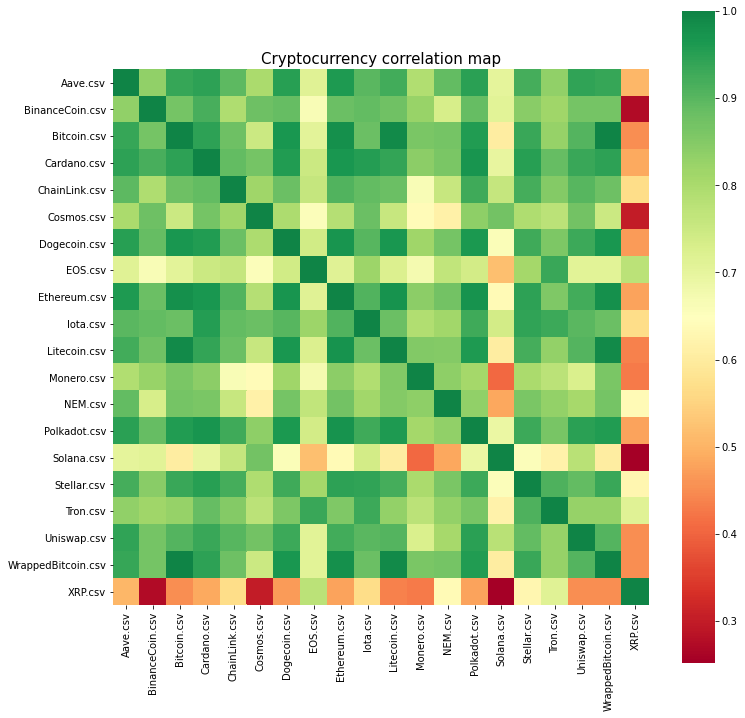

In [3]:
temp_df = df[cols_to_use]
corrmat = temp_df.corr(method='spearman')
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat,
            vmax=1.,
            cmap="RdYlGn",
            #robust=True,
            center=0.65,
            square=True)
plt.title("Cryptocurrency price correlation map", fontsize=15)
plt.show()